Dans notre cas, les données avec lesquelles nous allons travailler seront des images. Pour les données d'image en particulier, l'augmentation des données peut consister en des choses comme le retournement de l'image horizontalement ou verticalement, la rotation de l'image, le zoom avant ou arrière, le recadrage ou la variation de la couleur.
Pourquoi avons-nous besoin d'une augmentation des données ?

Pour commencer, cela nous aidera à obtenir plus de données pour la formation. Peut-être avons-nous un petit ensemble d'entraînement, ou peut-être voulons-nous simplement agrandir notre ensemble d'entraînement. Nous pouvons le faire en augmentant nos données existantes, puis en ajoutant ces données à l'ensemble de formation.

Une autre raison d'utiliser l'augmentation des données est de réduire le surajustement.
Effectuer une augmentation de données dans le code

Voyons maintenant comment nous pouvons effectuer une augmentation de données à l'aide de Keras.

Tout d'abord, nous importons toutes les bibliothèques que nous utiliserons. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Ensuite, nous utiliserons ceci plotImages()fonction obtenue à partir de La documentation de TensorFlow pour tracer les images traitées dans notre notebook Jupyter. 

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Nous allons maintenant définir cette variable appelée genen tant que ImageDataGenerator. Tous les paramètres passés sont les différentes façons dont nous disons à Keras d'augmenter l'image. 

In [8]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

Vérifiez documentation pour comprendre les unités utilisées pour chaque technique d'augmentation que nous avons spécifiée. Par exemple, rotation_rangese mesure en degrés, tandis que width_shift_rangeest mesuré comme une fraction de la largeur de l'image.

Ensuite, nous choisissons une image aléatoire d'un chien à partir du disque. 

In [10]:
chosen_image = random.choice(os.listdir('../data_images/train/dogs'))

Nous créons ensuite une variable appelée image_pathet réglez-le sur l'emplacement relatif sur le disque de l'image choisie. 

In [14]:
image_path = '../data_images/train/dogs/' + chosen_image

 Notez que pour suivre, vous devrez pointer vers un emplacement et un fichier image valides sur votre machine.

Ensuite, nous obtiendrons l'image en lisant l'image du disque en utilisant plt.imread()et passant dans le image_path. Nous élargissons également les dimensions afin que l'image soit compatible pour savoir comment nous l'utiliserons plus tard. 

In [22]:
image = np.expand_dims(plt.imread(image_path),0)

Maintenant, nous allons tracer l'image juste pour voir à quoi ressemble l'image d'origine. 

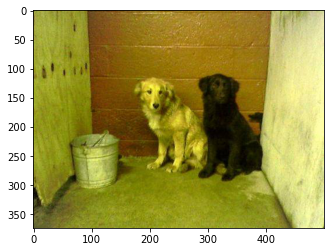

In [40]:
plt.imshow(image[0])

Ensuite, nous allons générer des lots d'images augmentées à partir de l'image d'origine. 

In [41]:
aug_iter = gen.flow(image)

 La flow()La fonction prend des données numériques et génère des lots de données augmentées.

Nous allons maintenant obtenir dix échantillons des images augmentées.



In [44]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

Nous allons maintenant tracer les images augmentées. 

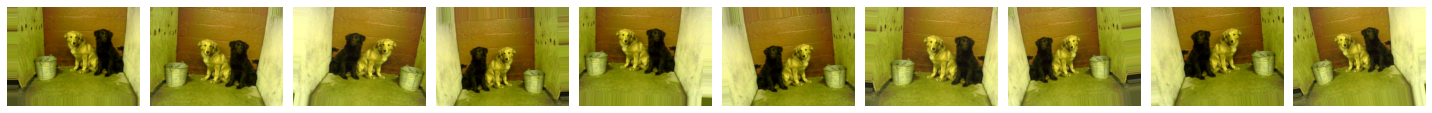

In [45]:
plotImages(aug_images)

 Ce sont dix images qui ont été augmentées à partir de l'image originale selon les paramètres que nous avons passés au ImageDataGeneratorplus tôt.

Nous pouvons voir que certaines des images ont été retournées horizontalement, certaines ont une légère variation de couleur, certaines sont légèrement inclinées vers la gauche ou la droite, et certaines sont légèrement décalées vers le bas ou vers le haut.
Enregistrer les données augmentées

Remarque, si vous souhaitez enregistrer ces images afin de pouvoir les ajouter à votre ensemble d'entraînement, puis gen.flow(), vous devez également spécifier le paramètre save_to_diret le mettre égal à un emplacement valide sur le disque.

Vous pouvez éventuellement spécifier un préfixe pour lequel ajouter les noms de fichier des images augmentées enregistrées, ainsi que spécifier éventuellement le type de fichier comme 'png'ou 'jpeg'images. 'png'est la valeur par défaut. 

In [49]:
aug_iter = gen.flow(image, save_to_dir='../data_images/', save_prefix='images_aug', save_format='jpeg')

Remarque, vous pouvez également utiliser ImageDataGenerator.flow_from_directory()par opposition à ImageDataGenerator.flow()si vous souhaitez générer des lots de données augmentées à partir de données enregistrées dans une structure de répertoire organisée sur le disque

In [51]:
aug_iter = gen.flow(image, save_prefix='images_aug', save_format='jpeg')